A leading telecoms operator in Indonesia would like to measure effectiveness of their campaigns. In particular, they want to answer;

*   Are my campaigns effective overall?
*   What type of customers should I target?
*   Are there customers that I should not target?
*   How can I maximize response rates of my campaigns?
*   How can I optimize my campaigns?

Populating the interactive namespace from numpy and matplotlib


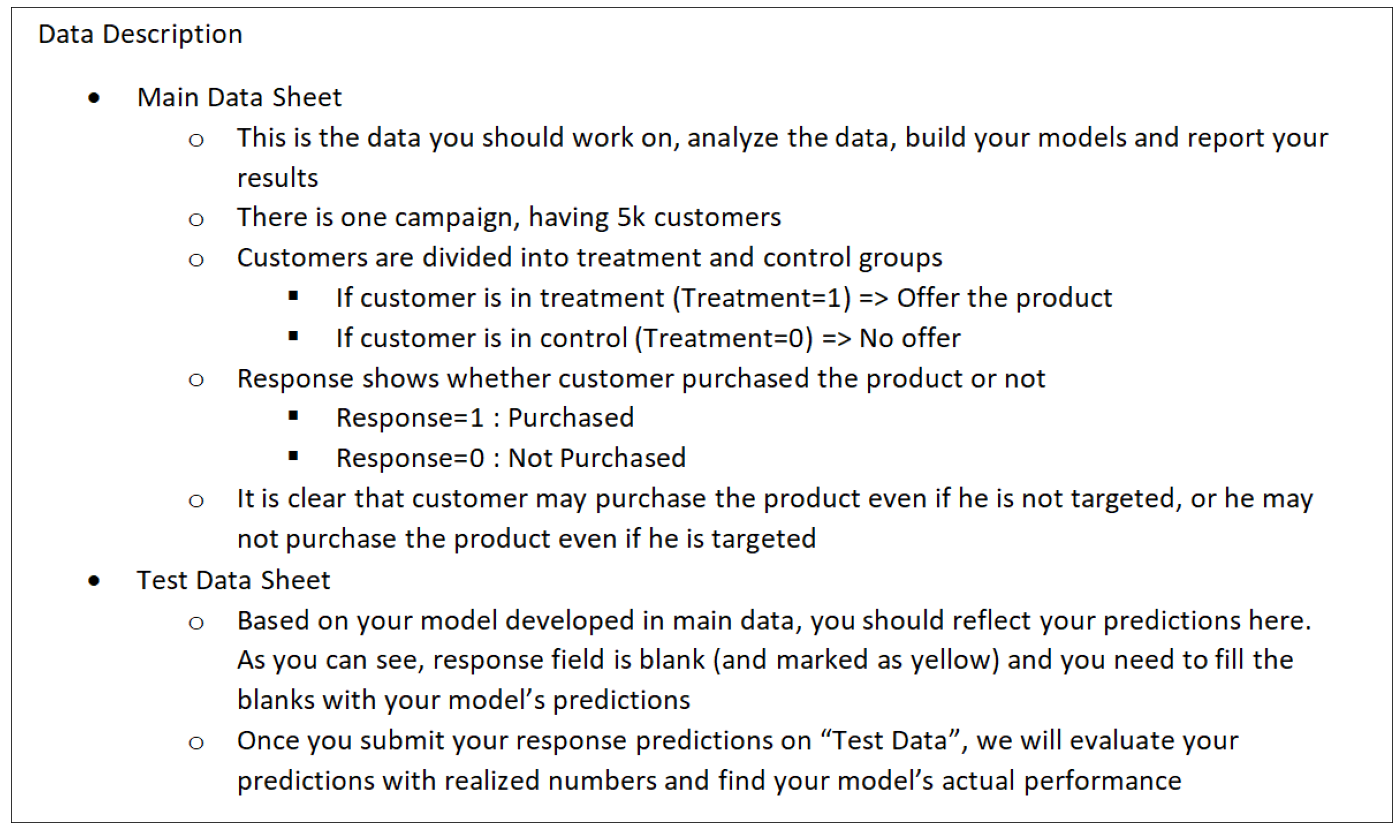

In [ ]:
 #importing Image class from PIL package  
from PIL import Image 
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
fig, ax = plt.subplots(figsize=(25,15))
img=Image.open('drive/MyDrive/Colab Notebooks/Case_XL.PNG')
imgplot = plt.imshow(img)
plt.yticks([])
plt.xticks([])
plt.show()

In [ ]:
pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 5.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=ff8f9cbe2a2c3d1c775807e57d8eff2cb10a9194bc03e25c1896d8e2664f5ede
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
import scipy
import sklearn as sk
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from itertools import combinations
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('drive/MyDrive/Colab Notebooks/XL Data.xlsx', sheet_name = 'Main Data')

In [ ]:
print("The raw_dataset has the following shape: {}.".format(df.shape))
df.head(5)

The raw_dataset has the following shape: (5000, 24).


,Customer_No,Campaign_ID,Treatment,Response,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20
0,1,1,1,0,0.687498,0.875153,0.008258,0.104846,0.923085,0.389724,0,0.601138,0.383264,0,0.623378,0.664762,0.421897,0.792814,0.256909,0.162140,0.790612,0.750691,0.574619,1
1,2,1,1,1,0.803111,0.486645,0.875048,0.178888,0.787625,0.160693,1,0.540208,0.234801,1,0.761690,0.472379,0.944845,0.331881,0.210738,0.611081,0.549276,0.179801,0.433172,1
2,3,1,1,0,0.611812,0.339746,0.470729,0.661294,0.466377,0.665199,0,0.991736,0.163761,1,0.933846,0.327720,0.372890,0.575293,0.757852,0.002344,0.208289,0.760725,0.351247,0
3,4,1,1,0,0.334324,0.686310,0.570324,0.516624,0.449102,0.327000,0,0.767498,0.299516,0,0.286490,0.055919,0.411782,0.992843,0.656838,0.076548,0.027267,0.875874,0.903338,0
4,5,1,1,0,0.989999,0.847866,0.179484,0.414471,0.520857,0.275867,0,0.645115,0.527084,0,0.173448,0.588752,0.681931,0.704829,0.597112,0.100747,0.787324,0.933161,0.893119,0


# Basic EDA

In [ ]:
pd.crosstab(df['Treatment'], df['Response'], margins=True)

Response,0,1,All
Treatment,,,
0,889,151,1040
1,3336,624,3960
All,4225,775,5000


On an event level of analysis, there are..


*   889 of Control Non Responders (not purchase if they don't receive an offer)
*   151 of Control Responders (purchase without an offer)
*   3336 of Treatment Non Responders (not purchase in any case)
*   624 of Treatment Responders (purchase if only get an offer)



In [ ]:
segment_val = [889,151,3336,624]
segment_name = ['Persuadables', 'Sure Things', 'Lost Causes', 'Sleeping Dogs']

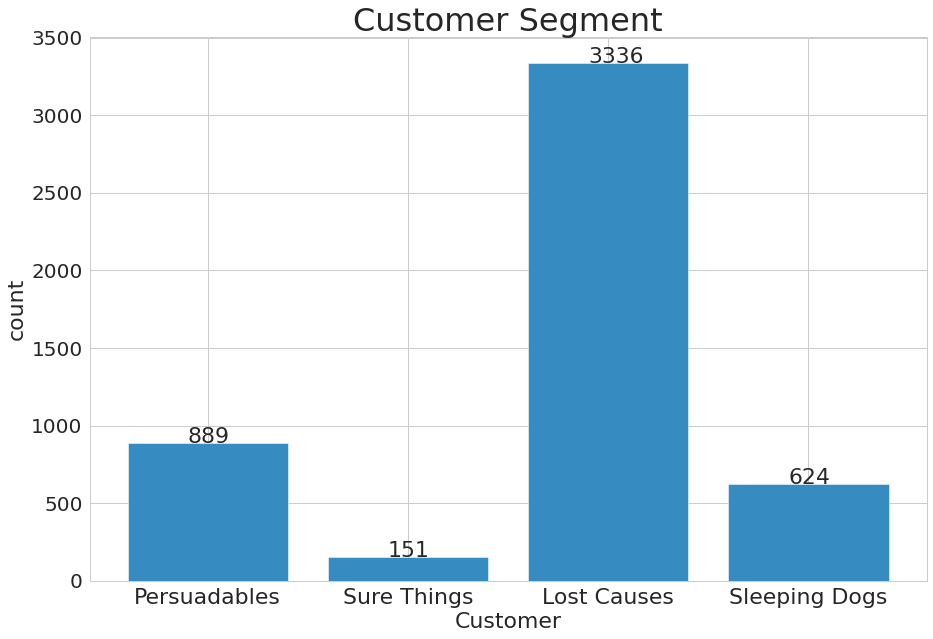

In [ ]:
#CREATING BAR PLOT
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,10))

status = list(segment_name)
seg_val = list(segment_val)

#set position of bar on x axis
r1 = np.arange(len(status))
r2 = [x + 0.25 for x in r1] #to set data label centerelize

status_pos = [i for i, _ in enumerate(status)]

plt.bar(status_pos, seg_val, color='#368BC1')
plt.xlabel("Customer", fontsize=22)
plt.ylabel("count", fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=22)
plt.title("Customer Segment", fontsize=32)

plt.xticks(status_pos, status, rotation=0)

#Text on the top of each barplot
label= list(seg_val)
for i in range(len(r2)):
    plt.text(x=r2[i]-0.35, y = list(seg_val)[i]+0.5, s=label[i], size=22)

plt.show()

In [ ]:
df['Response'].value_counts(normalize = True)

0    0.845
1    0.155
Name: Response, dtype: float64

In [ ]:
df['Treatment'].value_counts(normalize = True)

1    0.792
0    0.208
Name: Treatment, dtype: float64

In [ ]:
status =["Receive offer", "Didn't receive offer"]
treat_val =[0.792,0.208]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  del sys.path[0]


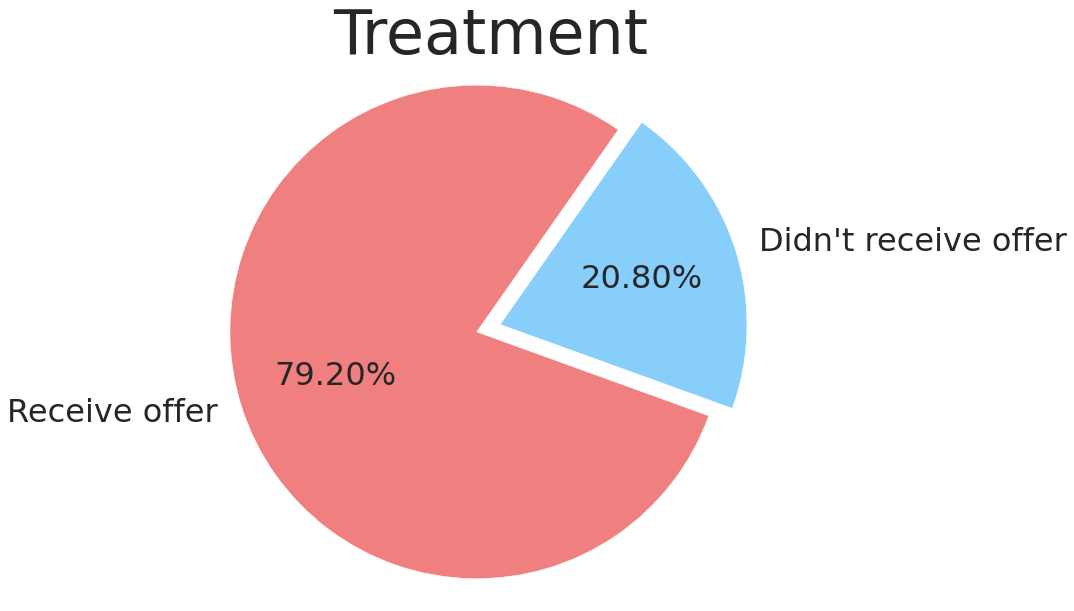

In [ ]:
# Data to plot
plt.subplots(figsize = (15,10))
labels = status
sizes = treat_val
colors = ['lightcoral','lightskyblue']
explode = (0,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=False, startangle=55, textprops={'fontsize': 32})

plt.title('Treatment', fontsize=62)
plt.axis('equal', fontsize=22)
plt.show()


The dataset is largely imbalanced - around 79.2% of users were treated while only 20.8% were in the control group.

In [ ]:
df1 = df.drop(columns=['Customer_No','Campaign_ID'], axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text major ticklabel objects>)

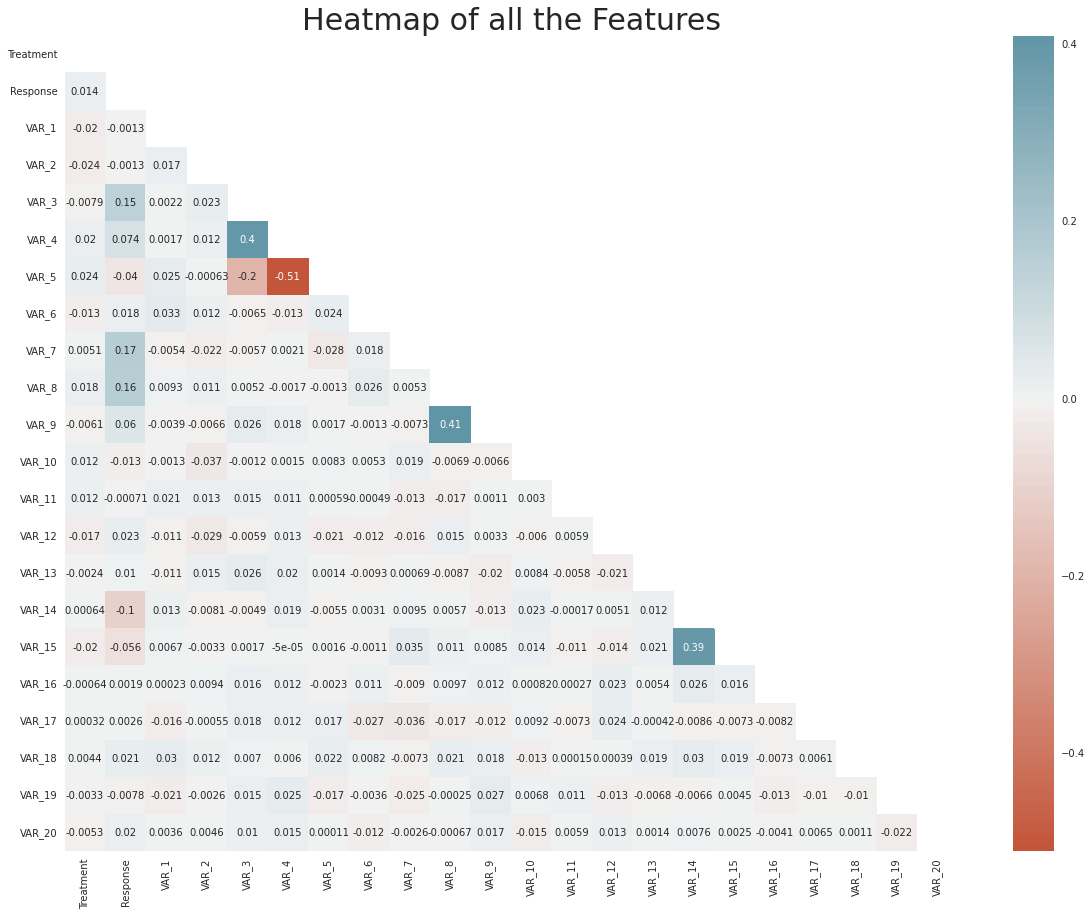

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,15))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df1.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, )
plt.title("Heatmap of all the Features", fontsize = 30)
plt.yticks(rotation=0)

In [ ]:
res_results_df = df.groupby('Treatment').agg({'Response':['mean', 'sum', 'count']})
res_results_df

Response           
               mean  sum count
Treatment                     
0          0.145192  151  1040
1          0.157576  624  3960

In [ ]:
print(f'Difference in response rate between control and treatment: {np.round(df.groupby("Treatment")["Response"].mean()[1] - df.groupby("Treatment")["Response"].mean()[0], 4)}')

Difference in response rate between control and treatment: 0.0124


More users response in the treatment (15.8%) than the control group (14.5%), indicating the treatment is effective at encouraging users to purchase the product: the ATE is positive and is about 1.24%. 

As the difference is not so large, a significance test is conducted.

# Data of Experiment

### Significance Test


In [ ]:
pvalue = proportions_ztest(count=res_results_df[('Response', 'sum')],
                  nobs=res_results_df[('Response', 'count')])[1]
pvalue.round(4)

0.3261

In [ ]:
df[df['Treatment']==1]['Response'].value_counts(normalize = True)

0    0.842424
1    0.157576
Name: Response, dtype: float64

The p-value (0.326) is > 0.05, so we know the ATE is not significant - which is the typical starting point for uplift modeling. It is not being exposed to enough people.

Only 15.8% or 16 out of every 100 users in our treatment group were effectively response to the treatment, suggesting the treatment is quite effective at capturing the attention of the users.

In [ ]:
data = {'Offer': [624, 3336], 'No Offer': [151, 889]}
pd.DataFrame(data, index= ['Purchased', 'Not Purchased'])

,Offer,No Offer
Purchased,624,151
Not Purchased,3336,889


In [ ]:
contingency_table = np.array([
                    [624, 151], 
                    [3336, 889]])

# Chi-Square Test
Significance level: $\alpha= 0.05$

$H_{0}$: There is no difference between  two *treatments* to make customers in making a purchase.

$H_{1}$: There is difference between  two *treatments* to make customers in making a purchase.

In [ ]:
pvalue = proportions_ztest(contingency_table[1, :], contingency_table.sum(axis=0), alternative='two-sided')
print(f"P-value of proportion z-test:", pvalue)

P-value of proportion z-test: (-0.9820344150660036, 0.3260828938660473)


In [ ]:
g, pvalue, dof, expctd = chi2_contingency(contingency_table, correction= False)
f"P-value of chi-square test: {pvalue:.4f}, Hence, we accept the null hypothesis (H0) in significance level = 0.05"

'P-value of chi-square test: 0.3261, Hence, we accept the null hypothesis (H0) in significance level = 0.05'

In [ ]:
pval = scipy.stats.chi2_contingency(contingency_table, correction= False)

In [ ]:
if pvalue < 0.05:
  print("Reject Null Hypothesis")
else:
  print("Accept Null Hypothesis")

Accept Null Hypothesis


## Proportions Z-Test

In [ ]:
zscore, p_value = proportions_ztest(contingency_table[1, :], contingency_table.sum(axis=0), alternative='two-sided')
f"P-value of proportions z-test: {p_value:.4f}, Hence, we accept the null hypothesis (H0) in significance level = 0.05"

'P-value of proportions z-test: 0.3261, Hence, we accept the null hypothesis (H0) in significance level = 0.05'

## Conclusion

There is no difference between two treatments (get the an offer or dont get an offer) to make customers in making a purchase. Meaning that our campaigns is not effective. This could be seen at the count of Treatment Responders (624) is less than Control Non Responders (889).

In [ ]:
# create target_class to indicate which segment event belongs to

df['target_class'] = 0 # Default set to Control Non-Responders where both treatment and outcome are 0.
df.loc[(df.Treatment == 0) & (df.Response ==1),'target_class'] = 1 # Control Responders
df.loc[(df.Treatment == 1) & (df.Response  ==0),'target_class'] = 2 # treatment Non-Responders
df.loc[(df.Treatment == 1) & (df.Response  ==1),'target_class'] = 3 # treatment Responders

In [ ]:
class_dict = {0:'Control Non-Responder', 1: 'Control Responder', 2: 'Treatment Non-Responder', 3: 'Treatment Responder'}

classes = ['Control Non-Responder', 'Control Responder', 'Treatment Non-Responder', 'Treatment Responder']


In [ ]:
# The value counts for the new 'target_class' match the values above.

df.target_class.value_counts()

2    3336
0     889
3     624
1     151
Name: target_class, dtype: int64

# Data Wrangling
## Checking missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer_No   5000 non-null   int64  
 1   Campaign_ID   5000 non-null   int64  
 2   Treatment     5000 non-null   int64  
 3   Response      5000 non-null   int64  
 4   VAR_1         5000 non-null   float64
 5   VAR_2         5000 non-null   float64
 6   VAR_3         5000 non-null   float64
 7   VAR_4         5000 non-null   float64
 8   VAR_5         5000 non-null   float64
 9   VAR_6         5000 non-null   float64
 10  VAR_7         5000 non-null   int64  
 11  VAR_8         5000 non-null   float64
 12  VAR_9         5000 non-null   float64
 13  VAR_10        5000 non-null   int64  
 14  VAR_11        5000 non-null   float64
 15  VAR_12        5000 non-null   float64
 16  VAR_13        5000 non-null   float64
 17  VAR_14        5000 non-null   float64
 18  VAR_15        5000 non-null 

In [ ]:
df.isnull().sum()

Customer_No     0
Campaign_ID     0
Treatment       0
Response        0
VAR_1           0
VAR_2           0
VAR_3           0
VAR_4           0
VAR_5           0
VAR_6           0
VAR_7           0
VAR_8           0
VAR_9           0
VAR_10          0
VAR_11          0
VAR_12          0
VAR_13          0
VAR_14          0
VAR_15          0
VAR_16          0
VAR_17          0
VAR_18          0
VAR_19          0
VAR_20          0
target_class    0
dtype: int64

OK, all data are clean.

In [ ]:
# Remaining cleaning of the data will be done to then have it ready for model building.
def clean_data(df): 
    
    """
    Perform remaning feature engineering 
    
    Args:
        df: dataframe
    
    Returns:
        df: dataframe ready for model building
    """
    # drop non-relevant features for model building purposes        
    df = df.drop(columns=['Customer_No','Campaign_ID' ], axis=1)
    
    # subset categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
  
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    return df

clean_df = clean_data(df)

clean_df.head()


,Treatment,Response,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,target_class
0,1,0,0.687498,0.875153,0.008258,0.104846,0.923085,0.389724,0,0.601138,0.383264,0,0.623378,0.664762,0.421897,0.792814,0.256909,0.162140,0.790612,0.750691,0.574619,1,2
1,1,1,0.803111,0.486645,0.875048,0.178888,0.787625,0.160693,1,0.540208,0.234801,1,0.761690,0.472379,0.944845,0.331881,0.210738,0.611081,0.549276,0.179801,0.433172,1,3
2,1,0,0.611812,0.339746,0.470729,0.661294,0.466377,0.665199,0,0.991736,0.163761,1,0.933846,0.327720,0.372890,0.575293,0.757852,0.002344,0.208289,0.760725,0.351247,0,2
3,1,0,0.334324,0.686310,0.570324,0.516624,0.449102,0.327000,0,0.767498,0.299516,0,0.286490,0.055919,0.411782,0.992843,0.656838,0.076548,0.027267,0.875874,0.903338,0,2
4,1,0,0.989999,0.847866,0.179484,0.414471,0.520857,0.275867,0,0.645115,0.527084,0,0.173448,0.588752,0.681931,0.704829,0.597112,0.100747,0.787324,0.933161,0.893119,0,2


Class 0: 1040
Class 1: 3960
Proportion: 4 : 1


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

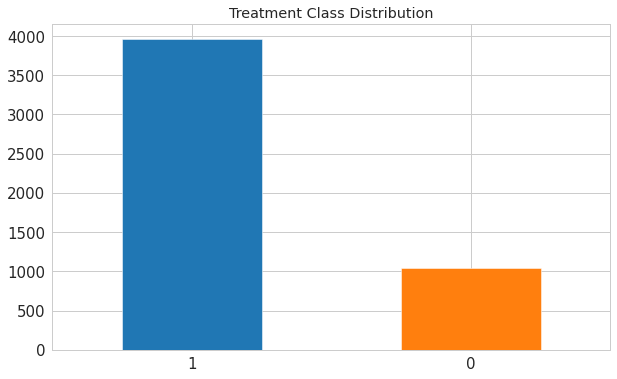

In [ ]:
fig = plt.figure(figsize = (10,6))
target_count = df1['Treatment'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', int(round(target_count[1] / target_count[0])), ': 1')
target_count.plot(kind='bar', title='Treatment Class Distribution', color=['#2077B4', '#FF7F0E'], fontsize = 15)
plt.xticks(rotation=0) 

By seeing the distributions we can have an idea how skewed the target variable is - most of the users were in the treatment group. The problem is that many approaches uplift models assume the treatment group and the control group have a balanced distribution, which needs not hold in practice. In this case we may reweight, or resample, the training datasets such that the assumption becomes valid. According to Jaśkowski and Jaroszewicz (2012) resampling the treatment distribution can affect the learning algorithm and result in information loss, however, as long as the algorithm does a reasonably good job at modeling the conditional class distributions, the results will still be meaningful. As our dataset consists of 5000 rows, we can be fairly confident any resampled dataset will contain enough instances to provide meaningful results.

Before proceeding with the random undersampling we have to separate the orginal dataframe so that the undersampling is only done on the training dataset. Why? for testing purposes, we want to test our models on a dataset with real life class distributions.

In [ ]:
pip install pylift

     |████████████████████████████████| 100 kB 3.8 MB/s 
  Created wheel for pylift: filename=pylift-0.1.5-py3-none-any.whl size=26030 sha256=0941e20cb2ce2f280972c5b4858078949607ae54f1fe7ec2c866524b05422efd
  Stored in directory: /root/.cache/pip/wheels/c3/ec/9d/69405e922f27de16e66aada83dce7227f6fddc71639d7cfe66
Successfully built pylift


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from pylift.eval import UpliftEval
import matplotlib.pyplot as plt


In [ ]:
features = ['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20']

target = 'Response'

treatment = 'Treatment'
df_prepared = df1[features+[treatment, target]]

In [ ]:
train, test = train_test_split(df_prepared, test_size=0.2, random_state=42)

In [ ]:
train.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment,Response
4227,0.269353,0.977062,0.179054,0.144099,0.488567,0.762235,1,0.978275,0.535037,1,0.366054,0.550901,0.000245,0.417245,0.275430,0.779592,0.493346,0.125137,0.429567,0,1,0
4676,0.425480,0.323984,0.024392,0.479784,0.569530,0.868371,1,0.977735,0.159405,1,0.335243,0.721150,0.609608,0.808537,0.779295,0.357123,0.339322,0.977163,0.811942,0,0,1
800,0.030404,0.830881,0.142175,0.318910,0.752292,0.083491,1,0.557118,0.268049,0,0.569366,0.897666,0.748081,0.198890,0.205935,0.864149,0.402565,0.824356,0.819413,1,0,0
3671,0.819759,0.265456,0.260631,0.199446,0.803753,0.729100,1,0.569136,0.100769,0,0.614078,0.866239,0.112927,0.107291,0.527564,0.100724,0.430298,0.938603,0.192437,1,1,0
4193,0.743992,0.159823,0.879208,0.592267,0.473591,0.432078,0,0.356458,0.400888,1,0.982192,0.906042,0.401510,0.258004,0.370004,0.330591,0.562990,0.546856,0.885269,1,1,0


In [ ]:
print("Number Of Observations in treated (1) and control (0) groups")
train[treatment].value_counts()

Number Of Observations in treated (1) and control (0) groups


1    3161
0     839
Name: Treatment, dtype: int64

In [ ]:
print("% of treated customers: ")
train[treatment].mean()

% of treated customers: 


0.79025

In [ ]:
print("% of response: ")
train[target].mean()

% of response: 


0.15975

In [ ]:
respons = df[df['Treatment'] ==1 ]

In [ ]:
respons['Response'].value_counts(normalize=True)

0    0.842424
1    0.157576
Name: Response, dtype: float64

In [ ]:
df.groupby(treatment)[target].mean()*100

Treatment
0    14.519231
1    15.757576
Name: Response, dtype: float64

In [ ]:
segment_name = ["Buy product", "Didn't buy product"]
segment_val =[15.8, 14.5]

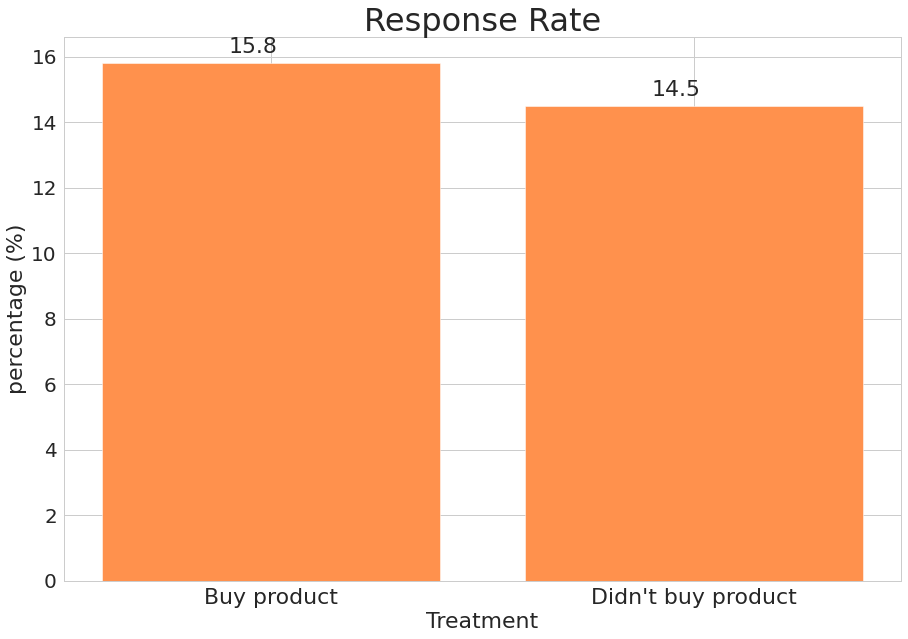

In [ ]:

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,10))

status = list(segment_name)
seg_val = list(segment_val)

#set position of bar on x axis
r1 = np.arange(len(status))
r2 = [x + 0.25 for x in r1] #to set data label centerelize

status_pos = [i for i, _ in enumerate(status)]

plt.bar(status_pos, seg_val, color='#FF914D')
plt.xlabel("Treatment", fontsize=22)
plt.ylabel("percentage (%)", fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=22)
plt.title("Response Rate", fontsize=32)

plt.xticks(status_pos, status, rotation=0)

#Text on the top of each barplot
label= list(seg_val)
for i in range(len(r2)):
    plt.text(x=r2[i]-0.35, y = list(seg_val)[i]+0.3, s=label[i], size=22)

plt.show()

In [ ]:
segment_name = ["(T=1|R=1)", "(T=1|R=0)"]
segment_val =[15.8, 84.2]

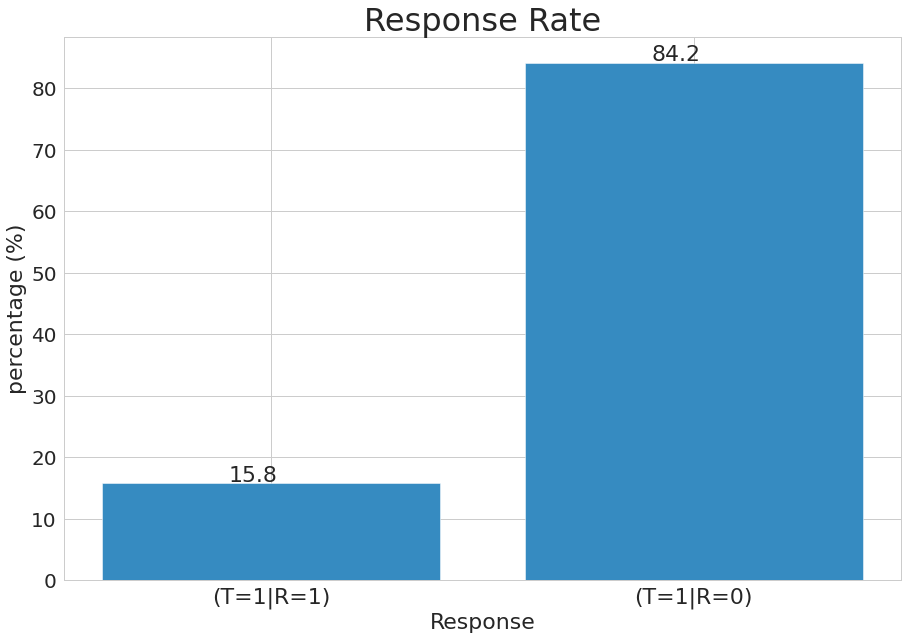

In [ ]:

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,10))

status = list(segment_name)
seg_val = list(segment_val)

#set position of bar on x axis
r1 = np.arange(len(status))
r2 = [x + 0.25 for x in r1] #to set data label centerelize

status_pos = [i for i, _ in enumerate(status)]

plt.bar(status_pos, seg_val, color='#368BC1')
plt.xlabel("Response", fontsize=22)
plt.ylabel("percentage (%)", fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=22)
plt.title("Response Rate", fontsize=32)

plt.xticks(status_pos, status, rotation=0)

#Text on the top of each barplot
label= list(seg_val)
for i in range(len(r2)):
    plt.text(x=r2[i]-0.35, y = list(seg_val)[i]+0.3, s=label[i], size=22)

plt.show()

Text(0.5, 1.0, 'Response rate')

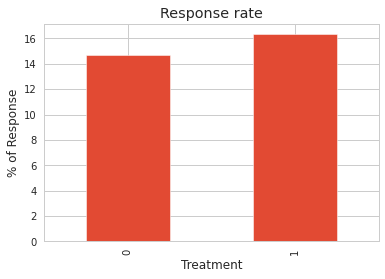

In [ ]:
(train.groupby(treatment)[target].mean()*100).plot.bar()
plt.xlabel('Treatment')
plt.ylabel('% of Response')
plt.title('Response rate')

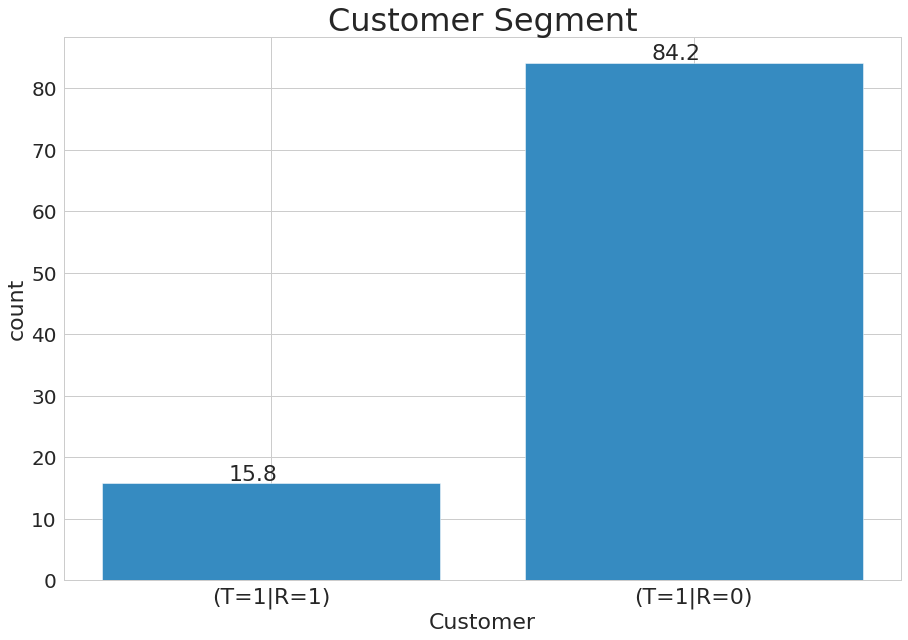

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,10))

status = list(segment_name)
seg_val = list(segment_val)

#set position of bar on x axis
r1 = np.arange(len(status))
r2 = [x + 0.25 for x in r1] #to set data label centerelize

status_pos = [i for i, _ in enumerate(status)]

plt.bar(status_pos, seg_val, color='#368BC1')
plt.xlabel("Customer", fontsize=22)
plt.ylabel("count", fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=22)
plt.title("Customer Segment", fontsize=32)

plt.xticks(status_pos, status, rotation=0)

#Text on the top of each barplot
label= list(seg_val)
for i in range(len(r2)):
    plt.text(x=r2[i]-0.35, y = list(seg_val)[i]+0.5, s=label[i], size=22)

plt.show()

In [ ]:
df1.columns

Index(['Treatment', 'Response', 'VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5',
       'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12',
       'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19',
       'VAR_20'],
      dtype='object')

In [ ]:
# generate features and labels
Y_train = train['Response']
X_train = train[features+[treatment]]

Y_test = test['Response']
X_test = test[features+[treatment]]

In [ ]:
X_train.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,Treatment
4227,0.269353,0.977062,0.179054,0.144099,0.488567,0.762235,1,0.978275,0.535037,1,0.366054,0.550901,0.000245,0.417245,0.275430,0.779592,0.493346,0.125137,0.429567,0,1
4676,0.425480,0.323984,0.024392,0.479784,0.569530,0.868371,1,0.977735,0.159405,1,0.335243,0.721150,0.609608,0.808537,0.779295,0.357123,0.339322,0.977163,0.811942,0,0
800,0.030404,0.830881,0.142175,0.318910,0.752292,0.083491,1,0.557118,0.268049,0,0.569366,0.897666,0.748081,0.198890,0.205935,0.864149,0.402565,0.824356,0.819413,1,0
3671,0.819759,0.265456,0.260631,0.199446,0.803753,0.729100,1,0.569136,0.100769,0,0.614078,0.866239,0.112927,0.107291,0.527564,0.100724,0.430298,0.938603,0.192437,1,1
4193,0.743992,0.159823,0.879208,0.592267,0.473591,0.432078,0,0.356458,0.400888,1,0.982192,0.906042,0.401510,0.258004,0.370004,0.330591,0.562990,0.546856,0.885269,1,1


In [ ]:
# up sample only the train dataset with SMOTE
sm = SMOTE(random_state=42)
X_train_ov, Y_train_ov = sm.fit_resample(X_train, Y_train)
    
X_train_ov = pd.DataFrame(X_train_ov, columns=[features+[treatment]])

Y_train_ov = pd.DataFrame(Y_train_ov)

In [ ]:
X_train_ov.shape

(6722, 21)

In [ ]:
Y_train_ov.shape

(6722, 1)

In [ ]:
def oversample(df_prepared, column, majority_value, minority_value):
    
    """
    
    Oversample dataframe to address class imbalance
    
    Args:
        df: dataframe 
        column: string feature that contains class imbalance
        majority_value: value of feature that is majority
        minority_value: value of feature that is minority
    
    Returns:
        df_oversampled: Dataframe with oversampling. Note that this should only be for training data.
    """
    
    # Over-sample Minority Class approach from Elite Data Science 
    # https://elitedatascience.com/imbalanced-classes


    # Seperate majority and minority classes
    df_majority = df_prepared[df_prepared[column] == majority_value]
    df_minority = df_prepared[df_prepared[column] == minority_value]
    
    majority_n_samples = df_prepared[column].value_counts()[majority_value]
    
    # Oversample minority class
    df_minority_oversampled = resample(df_minority,
                                replace=True,
                                n_samples=majority_n_samples,
                                random_state=42)

    # Combine majority class with over sampled minority class
    df_oversampled = pd.concat([df_majority, df_minority_oversampled])
    
    return df_oversampled

def oversample_train(train):
    
    """
    Over samples training data and returns X and y dataframes for build_model arguments
    
    Args:
        train_df: dataframe containing training data.
    
    Returns:
        X_train: dataframe containing features to be inputted for classifier model
        y_train: dataframe containing 'target_class'
    
    """
    
    train_df_oversample = oversample(train, 'Treatment', 0, 1)
    X_train = train_df_oversample.drop(columns=['Response',], axis=1)
    y_train = train_df_oversample.Response
    
    
    
    return X_train, y_train



X_train_oversampled, y_train_oversampled = oversample_train(train)

In [ ]:
X,y,t=train[features],train[target],train[treatment]

In [ ]:
y.head()

4227    0
4676    1
800     0
3671    0
4193    0
Name: Response, dtype: int64

# Propensity Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
rf_propensity=RandomForestClassifier()
rf_propensity.fit(X,y)

RandomForestClassifier()

In [ ]:
propensity_prediction=rf_propensity.predict_proba(test[features])[:,1]

Max Cumulative Gain: 0.0


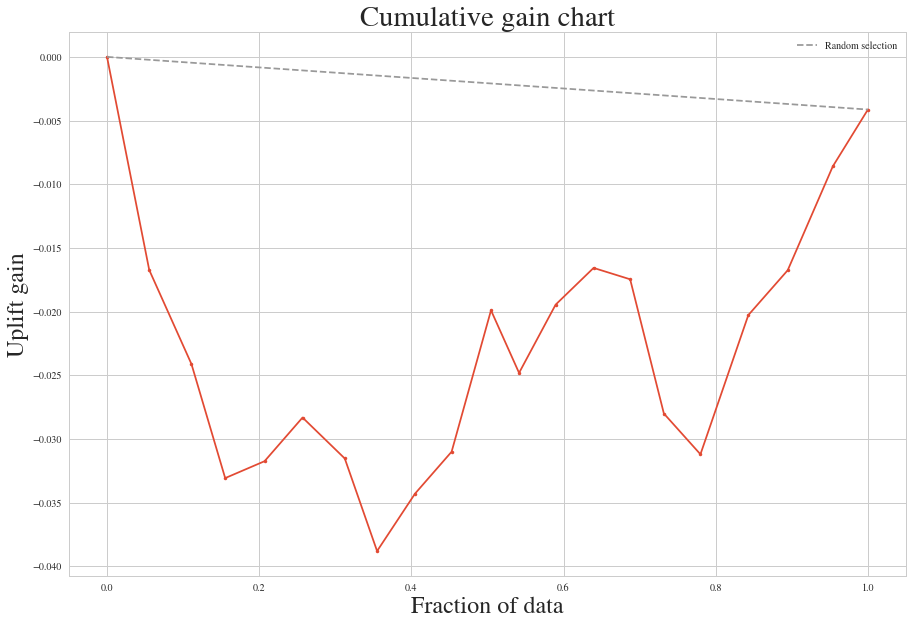

In [ ]:
upev_propensity = UpliftEval(test[treatment], test[target], propensity_prediction)
print('Max Cumulative Gain:' , np.round(upev_propensity.max_cgains,2))
upev_propensity.plot(plot_type='cgains')

Text(0, 0.5, 'Uplift')

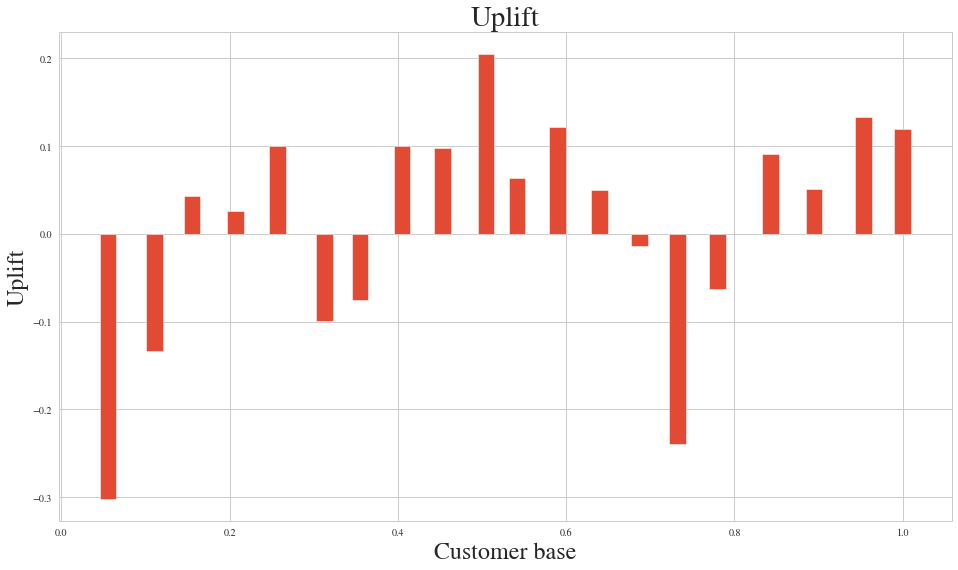

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(x=upev_propensity.uplift_x, height=upev_propensity.uplift_y, width=0.02)
plt.title('Uplift')
plt.xlabel('Customer base')
plt.ylabel('Uplift')

# 2 models approach

Split on:
*   Treated
*   Control


In [ ]:
X_c,y_c=X[t==0],y[t==0]
X_t,y_t=X[t==1],y[t==1]


In [ ]:
rf_t=RandomForestClassifier()
rf_c=RandomForestClassifier()

In [ ]:
rf_c.fit(X_c, y_c)

RandomForestClassifier()

In [ ]:
rf_t.fit(X_t,y_t)

RandomForestClassifier()

In [ ]:
test_control=rf_c.predict_proba(test[features])[:,1]
test_treated=rf_t.predict_proba(test[features])[:,1]

In [ ]:
uplift_2_models=test_treated-test_control

Max Cumulative Gain:  0.018


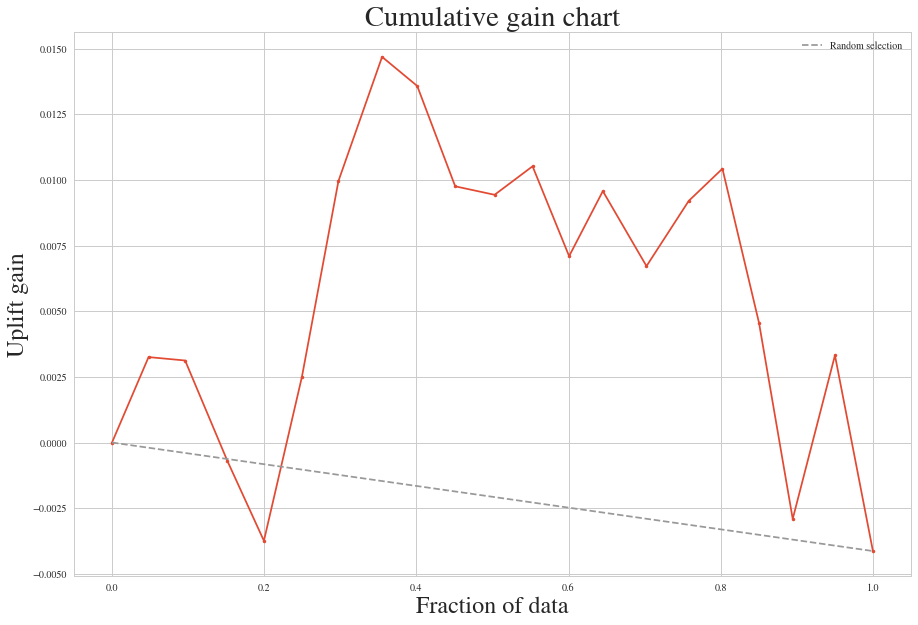

In [ ]:
from pylift.eval import UpliftEval
upev_2_models = UpliftEval(test[treatment], test[target], uplift_2_models)
print("Max Cumulative Gain: ", np.round(upev_2_models.max_cgains,3))
upev_2_models.plot(plot_type='cgains')

Text(0, 0.5, 'Uplift')

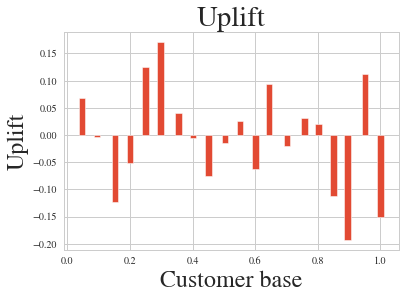

In [ ]:
plt.bar(x=upev_2_models.uplift_x, height=upev_2_models.uplift_y, width=0.02)
plt.title('Uplift')
plt.xlabel('Customer base')
plt.ylabel('Uplift')

In [ ]:
transformed_outcome=(train[target]==train[treatment]).astype(int)

In [ ]:
rf_transformed=RandomForestClassifier()

In [ ]:
rf_transformed.fit(X,transformed_outcome)

RandomForestClassifier()

In [ ]:
uplift_transformed_outcome=rf_transformed.predict_proba(test[features])[:,1]

Max Cumulative Gain:  0.003


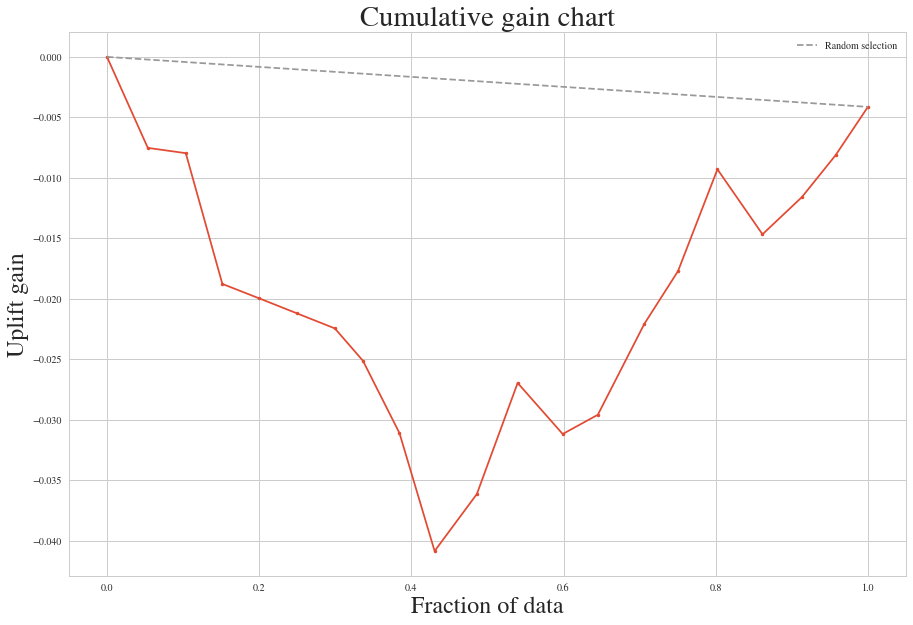

In [ ]:
upev_transformed_outcome = UpliftEval(test[treatment], test[target], uplift_transformed_outcome)
print ('Max Cumulative Gain: ',np. round (upev_transformed_outcome.max_cgains,3))
upev_transformed_outcome.plot(plot_type='cgains')

Text(0, 0.5, 'Uplift')

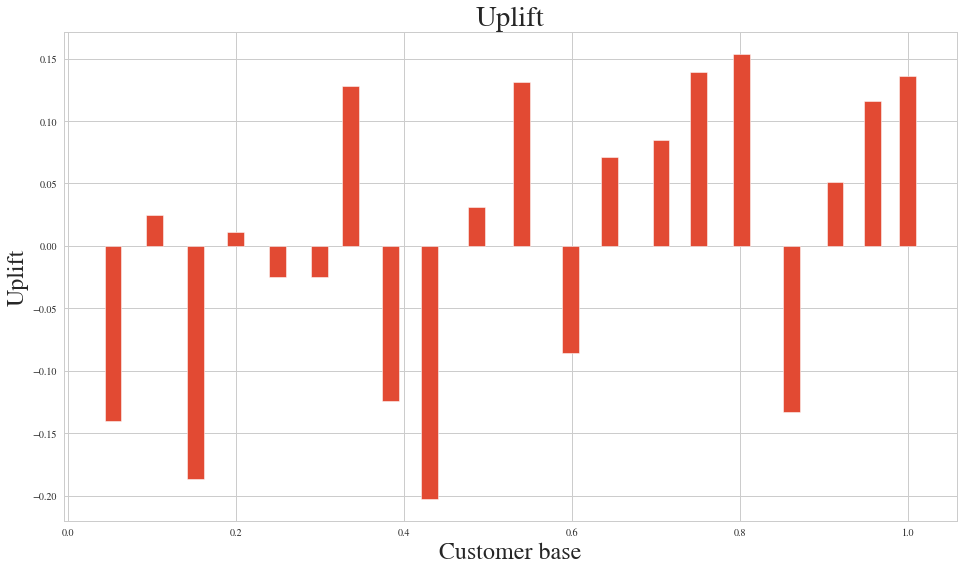

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(x=upev_transformed_outcome.uplift_x, height=upev_transformed_outcome.uplift_y, width=0.02)
plt.title('Uplift')
plt.xlabel('Customer base')
plt.ylabel('Uplift' )

# 1 Model

In [ ]:
from pylift import TransformedOutcome
up = TransformedOutcome(train, col_treatment = treatment, col_outcome= target, sklearn_model = RandomForestRegressor)

In [ ]:
up.fit()

Max Cumulative Gain:  0.048


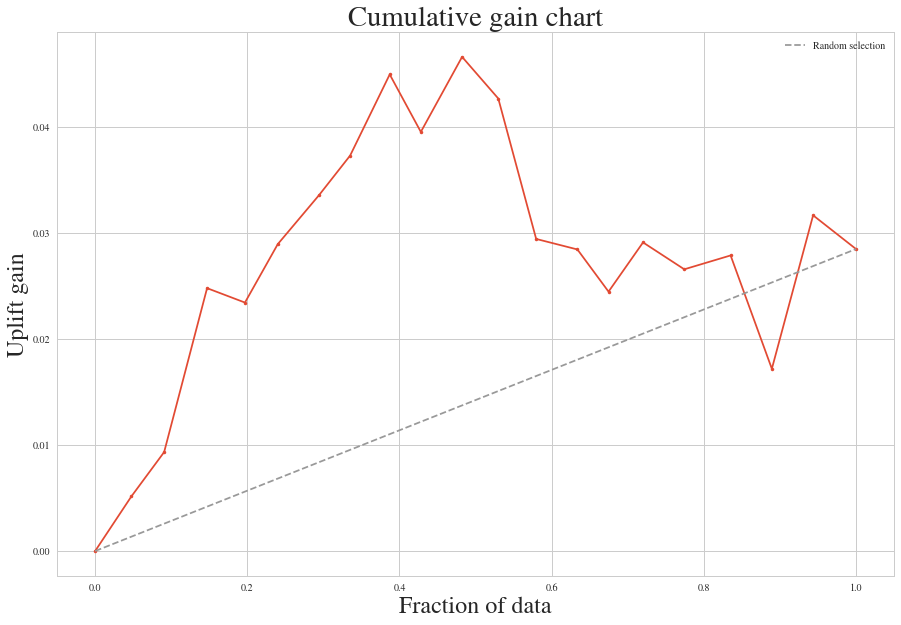

In [ ]:


up.plot(plot_type='cgains')
print('Max Cumulative Gain: ',np.round(up.test_results_.max_cgains,3))

Text(0, 0.5, 'Uplift')

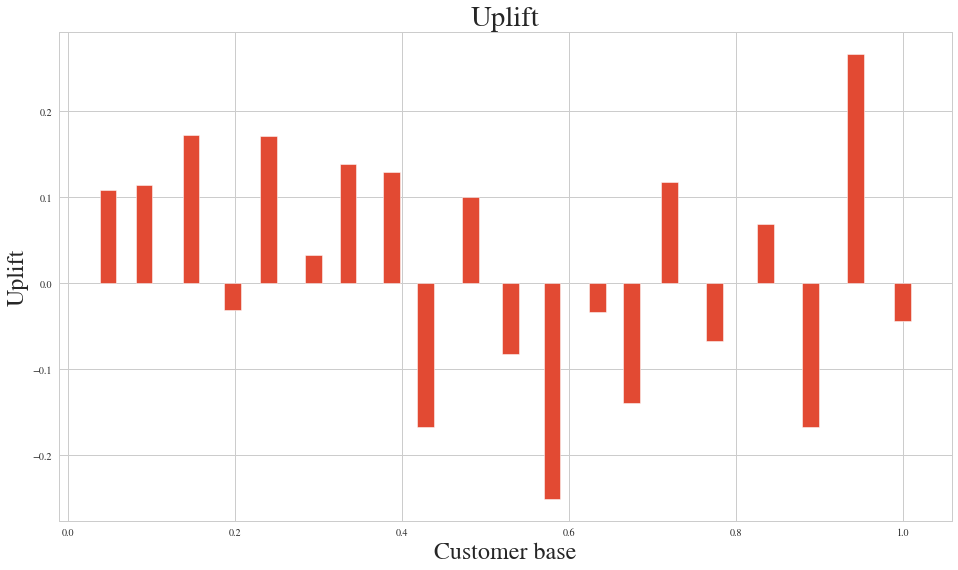

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(x=up.test_results_.uplift_x, height=up.test_results_.uplift_y, width=0.02)
plt.title('Uplift')
plt.xlabel('Customer base')
plt.ylabel('Uplift')

# NN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
class Model(nn.Module):
  def __init__(self, num_inputs):
    super(Model, self).__init__()
    self.num_inputs = num_inputs

    self.pipe = nn.Sequential(
    nn.Linear(num_inputs, 30),
    nn.ReLU(),
    nn.Linear(30, 20),
    nn.ReLU(),
    nn.Linear(20, 15),
    nn.ReLU(),
    nn.Linear(15, 10),
    nn.ReLU(),
    nn.Linear(10, 8),
    nn.ReLU(),
    #nn.Dropout(p=0.4),
    nn.Linear(8, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    
    nn.ReLU()
    )
    self.value=nn.Linear(3, 1)
    self.action=nn.Linear(3, 2)
    self.sig=nn.Sigmoid()

  def forward(self,x):
    r=self.pipe(x)
    value= self.value(r)
    action=self.action(r)
    advAverage = torch.mean(action, dim=1, keepdim=True)
    Q = value + action - advAverage
    res = self.sig(Q)
    return res

In [ ]:
net=Model(X.shape[1])
optimizer = optim.Adam(net.parameters(), lr=0.001)

dataset = TensorDataset(torch.FloatTensor(X.values), torch.LongTensor(t.values), torch.FloatTensor(y.values))

loader=DataLoader(dataset, 128)
for epoch in range (50): # loop over the dataset multiple times
    running_loss = 0.0
    for batch_ndx, sample in enumerate(loader):
      optimizer.zero_grad()
      # get the inputs; data is a list of (inputs, labels)
      inputs, treat, labels = sample

      # zero the parameter gradients

      # forward + backward + optimize
      outputs = net(inputs)
      out1=outputs.gather(1,treat.unsqueeze(-1)).squeeze(-1)
      
      out0=1-out1
      out=torch.vstack([out0, out1])
      lab=torch.vstack([1-labels, labels])

      loss = nn.BCELoss()(out, lab)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      if batch_ndx % 100 == 99:  # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_ndx + 1, running_loss / 2000) )
          running_loss = 0.0

res=net(torch.FloatTensor(test[features].values)).detach().numpy()
uplift_net=res[:,1]-res[:,0]

Max Cumulative Gain:  0.002


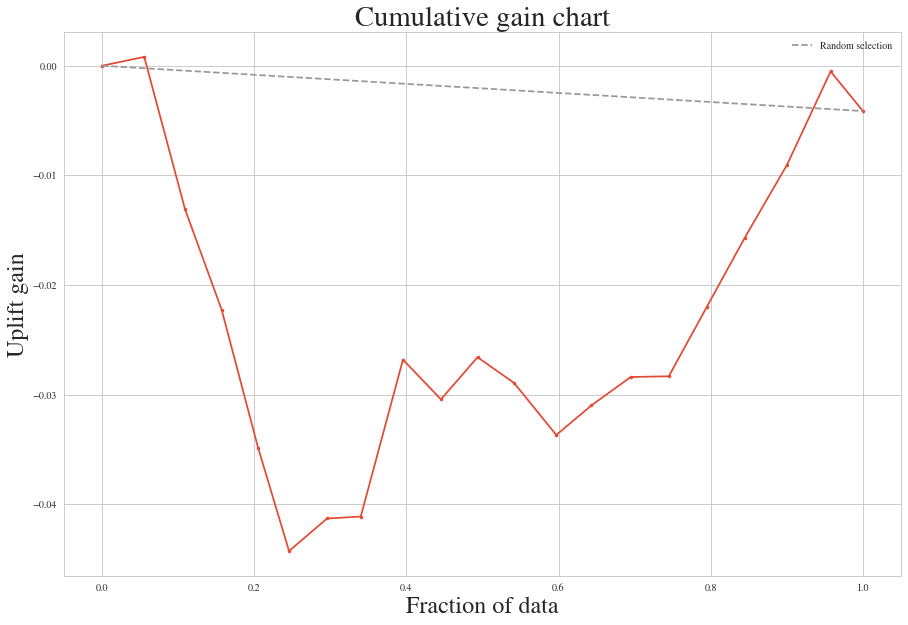

In [ ]:
upev_net = UpliftEval(test[treatment], test[target], uplift_net)
print('Max Cumulative Gain: ',np. round (upev_net.max_cgains,3))
upev_net.plot(plot_type='cgains')

# Cumulative gain by model

Text(0, 0.5, 'Cumulative gain')

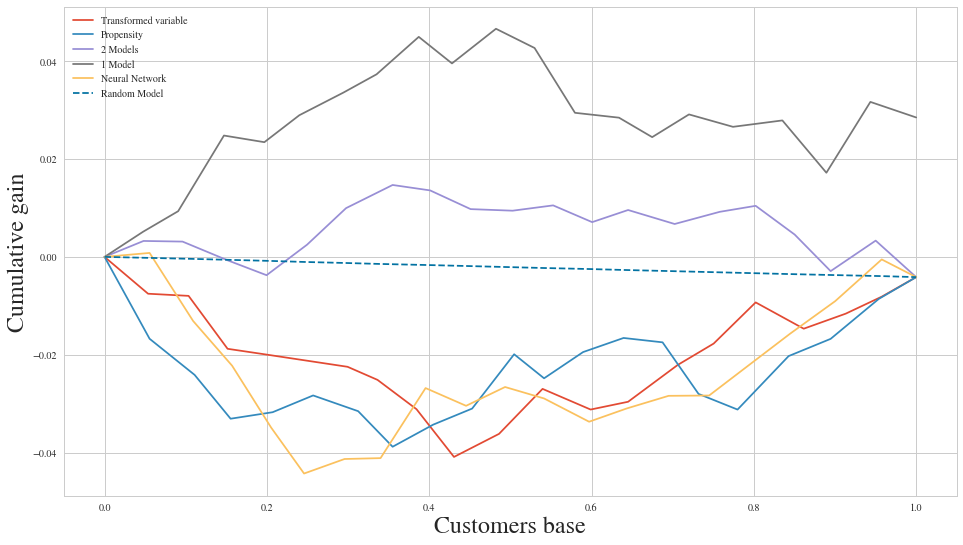

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(upev_transformed_outcome.cgains_x,
upev_transformed_outcome.cgains_y, label='Transformed variable')
plt.plot(upev_propensity.cgains_x, upev_propensity.cgains_y, label='Propensity')
plt.plot(upev_2_models.cgains_x, upev_2_models.cgains_y, label='2 Models')
plt.plot(up.test_results_.cgains_x, up.test_results_.cgains_y, label='1 Model')
plt.plot(upev_net.cgains_x, upev_net.cgains_y, label='Neural Network')
plt.plot(upev_net.cgains_x, np.linspace(
    upev_net.cgains_y[0], upev_net.cgains_y[-1], len(upev_net.cgains_y)), 'b--', label='Random Model')
plt.legend()
plt.xlabel('Customers base')
plt.ylabel('Cumulative gain')

Class 0: 4225
Class 1: 775
Proportion: 5 : 1


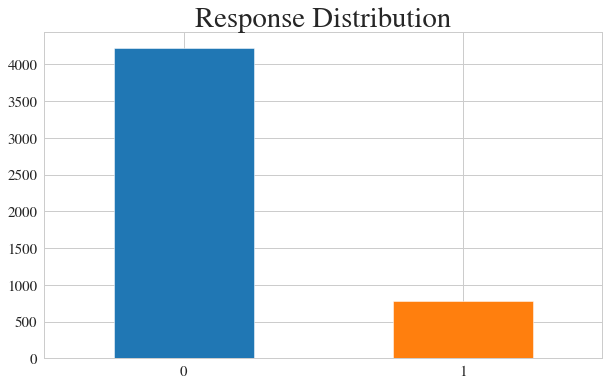

In [ ]:
plt.figure(figsize = (10,6))
target_count = df1['Response'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', int(round(target_count[0] / target_count[1])), ': 1')
target_count.plot(kind='bar', title='Response Distribution', color=['#2077B4', '#FF7F0E'], fontsize = 15)
plt.xticks(rotation=0) 
plt.show()

Much like in the previous example, the treatment class is highly imbalanced, with roughly 1 in every 5 users being response to the treatment.


In [ ]:
train, test  = train_test_split(df1, test_size=0.2, random_state=42, stratify=df1['Response'])

In [ ]:
train.head()

,Treatment,Response,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20
4767,1,1,0.455836,0.484415,0.590908,0.245974,0.502742,0.378138,0,0.970403,0.639417,0,0.683398,0.601024,0.651888,0.473735,0.578811,0.410679,0.598490,0.548313,0.157644,1
3032,1,0,0.650204,0.179145,0.812151,0.222944,0.577578,0.416246,1,0.839396,0.654530,0,0.396613,0.402692,0.572189,0.210261,0.263953,0.168424,0.820341,0.847827,0.885207,0
16,1,0,0.040369,0.878847,0.488071,0.493948,0.431208,0.960413,1,0.482426,0.112836,0,0.598779,0.179089,0.757033,0.213999,0.171636,0.945442,0.923102,0.566134,0.762405,1
3993,1,1,0.581294,0.099830,0.796543,0.436714,0.570712,0.474975,1,0.688918,0.439371,0,0.963490,0.750774,0.409125,0.081808,0.016495,0.385252,0.703953,0.378436,0.448255,1
30,0,0,0.331869,0.151205,0.307056,0.547053,0.389057,0.582307,1,0.245650,0.202052,1,0.356130,0.954212,0.761091,0.784672,0.418789,0.530881,0.281348,0.210908,0.894051,0


In [ ]:
train.shape

(4000, 22)

#### Split train and test dataframe

In [ ]:
train_df, test_df = train_test_split(clean_df, test_size=0.2, random_state=42)

In [ ]:
X_train = train_df.drop(columns=['Treatment', 'Response','target_class'], axis=1)
y_train = train_df.target_class

X_test = test_df.drop(columns=['Treatment', 'Response','target_class'], axis=1)
y_test = test_df.target_class

# Check Balance Class

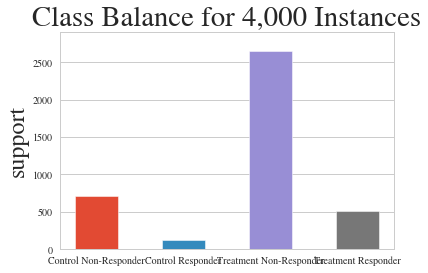

In [ ]:
def class_balance(y):
    
    """
    Create yellowbrick visualization to assess Class Balance
    
    Args:
        y: target variable
    
    Returns:
        viz_show: yellowbrick ClassBalance visualization output
    """
    
    y = pd.Series(y).map(class_dict).values
    visualizer = ClassBalance(labels=classes)

    visualizer.fit(y)
    viz_show = visualizer.show()
    
    return viz_show

class_balance_viz = class_balance(y_train)

There is a class imbalance which could have negative repurcussions for training the classification model.

An alternative training dataframe will be created that utilizes an over sampling method to reduce the imbalance.

# Resampling Method
In here, we decided to resample data using oversampling.

In [ ]:
def oversample(df, column, majority_value, minority_value):
    
    """
    
    Oversample dataframe to address class imbalance
    
    Args:
        df: dataframe 
        column: string feature that contains class imbalance
        majority_value: value of feature that is majority
        minority_value: value of feature that is minority
    
    Returns:
        df_oversampled: Dataframe with oversampling. Note that this should only be for training data.
    """
    
    # Over-sample Minority Class approach from Elite Data Science 
    # https://elitedatascience.com/imbalanced-classes


    # Seperate majority and minority classes
    df_majority = df[df[column] == majority_value]
    df_minority = df[df[column] == minority_value]
    
    majority_n_samples = df[column].value_counts()[majority_value]
    
    # Oversample minority class
    df_minority_oversampled = resample(df_minority,
                                replace=True,
                                n_samples=majority_n_samples,
                                random_state=42)

    # Combine majority class with over sampled minority class
    df_oversampled = pd.concat([df_majority, df_minority_oversampled])
    
    return df_oversampled

def oversample_train(train_df):
    
    """
    Over samples training data and returns X and y dataframes for build_model arguments
    
    Args:
        train_df: dataframe containing training data.
    
    Returns:
        X_train: dataframe containing features to be inputted for classifier model
        y_train: dataframe containing 'target_class'
    
    """
    
    train_df_oversample = oversample(train_df, 'Treatment', 0, 1)
    X_train = train_df_oversample.drop(columns=['Treatment', 'Response','target_class'], axis=1)
    y_train = train_df_oversample.target_class
    
    
    
    return X_train, y_train



X_train_oversampled, y_train_oversampled = oversample_train(train_df)

# Classification Model

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


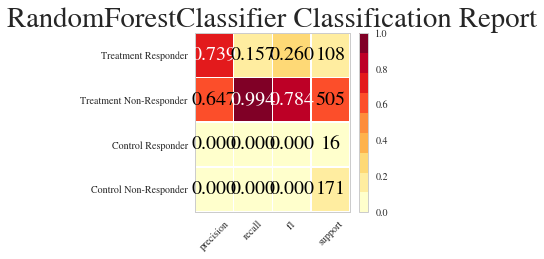

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


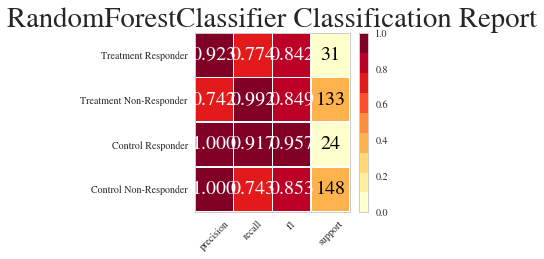

In [ ]:
# set clf variable
clf = RandomForestClassifier()

# compare both original training data and oversampled date in terms of classification metrics

def classification_report(X, y, model):
    
    """
    Create yellowbrick classification report visualization to assess classifier performance
    
    Args:
        X: features for model building
        y: target variable
        model: classifier model
    
    Returns:
        viz_show: yellowbrick ClassificationReport visualization output
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)
    
    
    visualizer = ClassificationReport(model, classes=classes, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    
    viz_show = visualizer.show()
    
    
    
    return viz_show

classification_report_ = classification_report(X_train, y_train, clf)
classification_report_upsampled = classification_report(X_train_oversampled, y_train_oversampled, clf)


We can see in the above classification reports that the top report contains many more cells where the precision and recall is closer to 0% for the minority class. This is due to the classifier being biased toward classifiying most of all as 'Control Non-Responder', the majority class.

The bottom classification report has a much more healthy balance in terms of precision and recall across the classes and crucially for the Treatment Responder segment.

Our business goal is to prioritize reaching out to The Treatment Responder segment so being able to increase the precision and recall for that class specifically is critical.



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


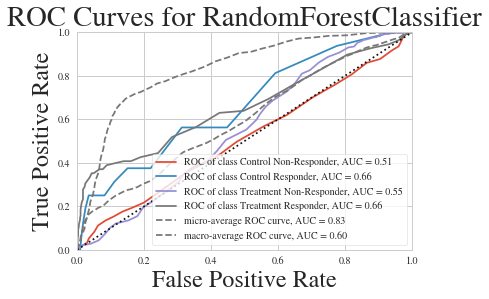

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


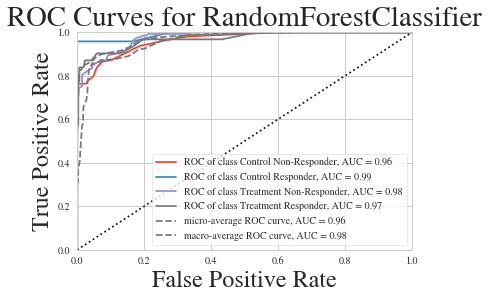

In [ ]:
# visualize performance measured by Area Under the Curve ("AUC") with ROC Curves
def rocauc(X, y, model):
    
    """
    Create yellowbrick ROC Curve visualization to assess classifier performance
    
    Args:
        X: features for model building
        y: target variable
        model: classifier model
    
    Returns:
        viz_show: yellowbrick ROCAUC visualization output
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)
    
    
    
    visualizer = ROCAUC(model, classes=classes, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    
    viz_show = visualizer.show()
    
    
    
    return viz_show

rocauc_ = rocauc(X_train, y_train, clf)
rocauc_upsampled = rocauc(X_train_oversampled, y_train_oversampled, clf)

The ROC Curves above also illustrate how the oversampled data performs better as the climb in the True Positive Rate, measured on the y axis, happens at a much greater rate than the unsampled data.

Once again, the curve we are particularly mindful of is the burgundy ROC Curve, which measures the Treatment Responders segment. The Area Under the Curve ("AUC") for the oversampled data is 0.95 which performs much better than the unsampled data with an AUC of 0.59.

In [ ]:
pred = clf.predict(X_test)

In [ ]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
#report = classification_report(pred, Y_test)
#print(report)

In [ ]:
def load_data(data_filepath):
    
    """
    Load data from flat file 
    
    Args:
        data_filepath: path where flat excel file is located
    
    Returns:
        df: dataframe of flat file
    """
    df = pd.read_excel(data_filepath)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    return df

In [ ]:
def feature_engineering(df):
    
    
    """
    Performs remaining data preprocessing and feature engineering to transform data to format ready for model building
    
    Args:
        df: loaded dataframe
    
    Returns:
        df: clean dataframe ready for model building (or intermediary upsampling step)
    
    """
    
    df = df.loc[df.Treatment == 1]
      
    #df = df.dropna(subset=['Customer_No','Campaign_ID'])
    
    df['target_class'] = 0 #CN
    df.loc[(df.Treatment == 0) & (df.Response ==1),'target_class'] = 1 # Control Responders
    df.loc[(df.Treatment == 1) & (df.Response ==0),'target_class'] = 2 # treatment Non-Responders
    df.loc[(df.Treatment == 1) & (df.Response ==1),'target_class'] = 3 # treatment Responders
    
    df.to_csv('drive/Colab Notebooks/clean_df.csv', index=False)
    
    df = df.drop(columns=['Customer_No','Campaign_ID' ], axis=1)
    
    cat_vars = df.select_dtypes(include=['object']).copy().columns
  
   
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    return df


In [ ]:
def build_model():
    
    """
    Builds pipeline and use grid search to perform classification
    
    Returns:
        cv: GridSearchCV pipeline with best parameters for the model
    """
    pipeline = Pipeline([
        ('clf', RandomForestClassifier())
        ])

    parameters = {
            'clf__n_estimators': [50, 100, 200], # number of trees in forest
            'clf__min_samples_split': [2, 3, 4], # minimum number of samples required for split to occur
            'clf__max_depth' : [4,5,6], # maximum depth of the tree; min samples_split supercedes in cases where max_depth isn't sufficient
            'clf__bootstrap': [True, False] # determine whether whole dataset should be used to build each tree

    }

    cv = GridSearchCV(pipeline, param_grid=parameters)
    
    return cv

In [ ]:
def evaluate_model(model, X_test, Y_test):
    """
    Evaluates model by providing individual category and summary metrics of model performance
    Args:
        model: RandomForestClassifier model
        X_test: subset of X values withheld from the model building process
        Y_test: subset of Y values witheld from the model building process and used to evaluate model predictions
        
    Returns:
        report: classification report with evaluation metrics (f1, precision, recall, support)
    """
     
    y_pred = model.predict(X_test)

    report = classification_report(y_pred, Y_test, labels = [0,1,2,3], target_names= ['CN', 'CR', 'TN', 'TR'], output_dict=True)

    print(report)
    
    return report


In [ ]:
def save_report(report):

    """
    Loads classification report to csv file
    Args:
        report: classification report returned from evaluate_model function
        
    Returns:
        report_df: save dataframe as a csv at specified file path
    """

    report_df = pd.DataFrame(report).transpose()

    report_df.columns = ['f1', 'precision', 'recall', 'support']

    report_df['labels'] = report_df.index

    report_df = report_df[['labels','f1', 'precision', 'recall', 'support']]
    
    report_df.to_excel('drive/MyDrive/Colab Notebooks/report.xlsx', index=False)


    return report_df

In [ ]:
def calc_uplift(model, df):
    
    """
    Calculates uplift scores for entire dataframe
    
    Args:
        model: RandomForestClassifier model
        df: clean dataframe that was returned form feature_engineering() function
    
    Returns:
        df: dataframe with uplifts scores for each event appended as series, titled 'uplift_score', as last column of dataframe
        
    """
    df_model = df.drop(['Response', 'Treatment','target_class'],axis=1)
    overall_proba = model.predict_proba(df_model)

    df['proba_CN'] = overall_proba[:,0] 
    df['proba_CR'] = overall_proba[:,1] 
    df['proba_TN'] = overall_proba[:,2] 
    df['proba_TR'] = overall_proba[:,3]

    df['uplift_score'] = df.eval('proba_CN + proba_TR - proba_TN - proba_CR')
    
    df.to_excel('drive/MyDrive/Colab Notebooks/uplift_df.xlsx', index=False, sheet_name='Uplift Scores')
    
    return df

In [ ]:
def calc_cumulative_gains(df):
    
    """
    Creates dataframe for cumulative gain chart
    
    Args:
        df: dataframe containing uplift scores
    
    Returns:
        df: dataframe containing cumulative gain % values for uplift model corresponding with % of population
    """
    df['TR_Value'] = 3
    
    rows = []
    for group in np.array_split(df.sort_values(by='uplift_score', ascending=True), 100):
        score = accuracy_score(group['target_class'].tolist(),
                                                   group['TR_Value'].tolist(),
                                                   normalize=False)

        rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

    lift = pd.DataFrame(rows)
    
    
    correct_total = []
    total = 0

    for i in range(100):
        increment = lift.NumCorrectPredictions[i] * 1
        total += increment
        correct_total.append(total)

    
    lift['cum_correctpredictions'] = correct_total
    
    population_total = []
    pop_num = 0

    for i in range(100):
        pop_num += lift.NumCases[i] *1
        population_total.append(pop_num)

    lift['cum_pop'] = population_total
    
    lift['%predictors'] = lift.cum_correctpredictions/np.sum(lift.NumCorrectPredictions)

    lift['%population'] = lift.cum_pop/np.sum(lift.NumCases)
    

    lift.to_excel('drive/MyDrive/Colab Notebooks/cum_gains_df.xlsx', index=False, sheet_name='Cum Gains')

    return lift



In [ ]:
def main():
    if len(sys.argv) == 2:
        data_filepath = sys.argv[1]
        print('Loading data...')
        
        
        print('Feature engineering...')
        clean_df = feature_engineering(df)
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        train_df, test_df = train_test_split(clean_df, test_size=0.2, random_state=42)
        
        print('Over sampling...')
        X_train, y_train = oversample_train(train_df)
        
        X_test = test_df.drop(columns=['Treatment', 'Response','target_class'], axis=1)
        y_test = test_df.target_class
        
        print('Building model...')
        model = build_model()
        
        
        print('Training model...')
        model.fit(X_train, y_train)
        
        
        print('Evaluating model...')
        report = evaluate_model(model, X_test, y_test)
        
        print('Saving report...')
        save_report(report)
        
        print('Calculating uplift on test data...')
        uplift_df = calc_uplift(model, clean_df)
        
        print('Calculating cumulative gains...')
        cumalative_gains_df = calc_cumulative_gains(uplift_df)
        
    else:
        print('One arguement, data filepath, required')
        
if __name__ == '__main__':
    main()

One arguement, data filepath, required


In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# Use this file to read in your data and prepare the plotly visualizations. The path to the data files are in
# `data/file_name.csv`

def return_figures():
    """Creates four plotly visualizations
    Args:
        None
    Returns:
        list (dict): list containing the four plotly visualizations
    """

    # first chart plots arable land from 1990 to 2015 in top 10 economies 
    # as a line chart
    
    uplift_df = pd.read_excel('drive/MyDrive/Colab Notebooks/uplift_df.xlsx', sheet_name='Uplift Scores')
    
    cum_gains_df = pd.read_excel('drive/MyDrive/Colab Notebooks/cum_gains_df.xlsx')
    
    clean_df = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_df.csv')
    clean_df = clean_df.loc[clean_df.Response == 1]
    
    class_dict = {0: 'Control Non-Responders', 1: 'Control Responders', 2: 'Treatment Non-Responders', 3: 'Treatment Responders'}
  
    clean_df['class_description'] = clean_df.target_class.map(class_dict)
    
    graph_one = []    
    graph_one.append(
      go.Scatter(
      x = cum_gains_df['%population'],
      y = cum_gains_df['%predictors'],
      mode = 'lines',
      name = 'Lift Curve'
      )
    )
    
    graph_one.append(
        go.Scatter(
            x = cum_gains_df['%population'],
            y = cum_gains_df['%population'],
            name = 'Random'
        )
    )

    layout_one = dict(title = 'Cumulative Gains Chart',
                xaxis = dict(title = '% of Population'),
                yaxis = dict(title = '% of Gain'),
                )
    
    # second chart plots    
    graph_two = []
    
    classes = clean_df['class_description'].unique().tolist()

    for class_ in classes:
        trace = go.Histogram(x = clean_df.loc[clean_df['class_description'] == class_].days_as_member.tolist(), opacity=0.75, name = str(class_))
        graph_two.append(trace)

    layout_two = dict(barmode='stack', 
                      xaxis = dict(title='Days As Member'), 
                      yaxis = dict(title='Count'), 
                      title='Count of Events by Member Seniority and Target Class'
                )
    
    # third chart plots percent of population that is rural from 1990 to 2015
    graph_three = []
    for class_ in classes:
        trace = go.Box(x = clean_df.loc[clean_df['class_description'] == class_].days_as_member.tolist(), name = class_)
        graph_three.append(trace)

    layout_three = dict(title = 'Days As Member by Target Class',
                xaxis = dict(title = 'Days as Member')
                       )
    
    # fourth chart shows rural population vs arable land
    #channel_melt = pd.melt(clean_df, id_vars = ['id', 'offer_type', 'treatment', 'outcome', 'target_class'], value_vars=['web', 'email', 'mobile', 'social'], var_name="channel")
    
    #channel_melt = channel_melt.loc[(channel_melt.value == 1) & (channel_melt.treatment == 1)]
    
    #channel_group = pd.DataFrame(channel_melt.groupby(['offer_type', 'channel', 'value']).mean()).reset_index().drop(columns=['value', 'treatment', ]).rename(columns={'outcome': 'conversion_%'})
    
    #channel_group['conversion_%'] = channel_group['conversion_%'] * 100
       
    

    graph_four = []
    
    fig_four = px.bar(channel_group, x="offer_type", y="conversion_%", color='channel', barmode='group', height=400)
    
    fig_four.update_layout(title='Average Conversion Rate by Offer Type and Channel')

    layout_four = dict(title = 'Chart Four',
                xaxis = dict(title = 'x-axis label'),
                yaxis = dict(title = 'y-axis label'),
                barmode='group'
                )
    
    # append all charts to the figures list
    figures = []
    figures.append(dict(data=graph_one, layout=layout_one))
    figures.append(dict(data=graph_two, layout=layout_two))
    figures.append(dict(data=graph_three, layout=layout_three))
    #figures.append(dict(data=graph_four, layout=layout_four))
    figures.append(fig_four)

    return figures